In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('data/stud.csv')


In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df.shape

(1000, 8)

2.2 Dataset Information

gender : sex of student --> (male/female)
race/ethinicity : ethnicity of students --> (Group A,B,C,D,E)
parental level of education --> (bachelor degree , some college , master's degree , associates's degree , high school)
lunch --> (standard/free lunch)
test preparation course --> completed / not completed
math score
reading score 
writing score

3.1 check missing values

In [12]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

As per above it is clear that there are no missing values are present into the dataset

3.2 checking the duplicates

In [13]:
df.duplicated().sum()

np.int64(0)

No duplicate values are found

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [16]:
### find the number of unique values in each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [17]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [18]:
print('categories in gender variable :  ' , end=' ')
print(df['gender'].unique())

print('categories in race/ethnicity variable :  ' , end=' ')
print(df['race_ethnicity'].unique())

print('categories in parental_level_of_education variable :  ' , end=' ')
print(df['parental_level_of_education'].unique())

print('categories in lunch variable :  ' , end=' ')
print(df['lunch'].unique())

print('categories in test_preparation_course variable :  ' , end=' ')
print(df['test_preparation_course'].unique())

categories in gender variable :   ['female' 'male']
categories in race/ethnicity variable :   ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental_level_of_education variable :   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch variable :   ['standard' 'free/reduced']
categories in test_preparation_course variable :   ['none' 'completed']


In [19]:
# define numercical and categorical columns
num_col = [col for col in df.columns if df[col].dtype != 'O']
cat_col = [col for col in df.columns if df[col].dtype == 'O']

print('numerical columns :' , num_col)
print('categorical columns : ', cat_col)

numerical columns : ['math_score', 'reading_score', 'writing_score']
categorical columns :  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [20]:
df['Total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['Total_score']/3

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

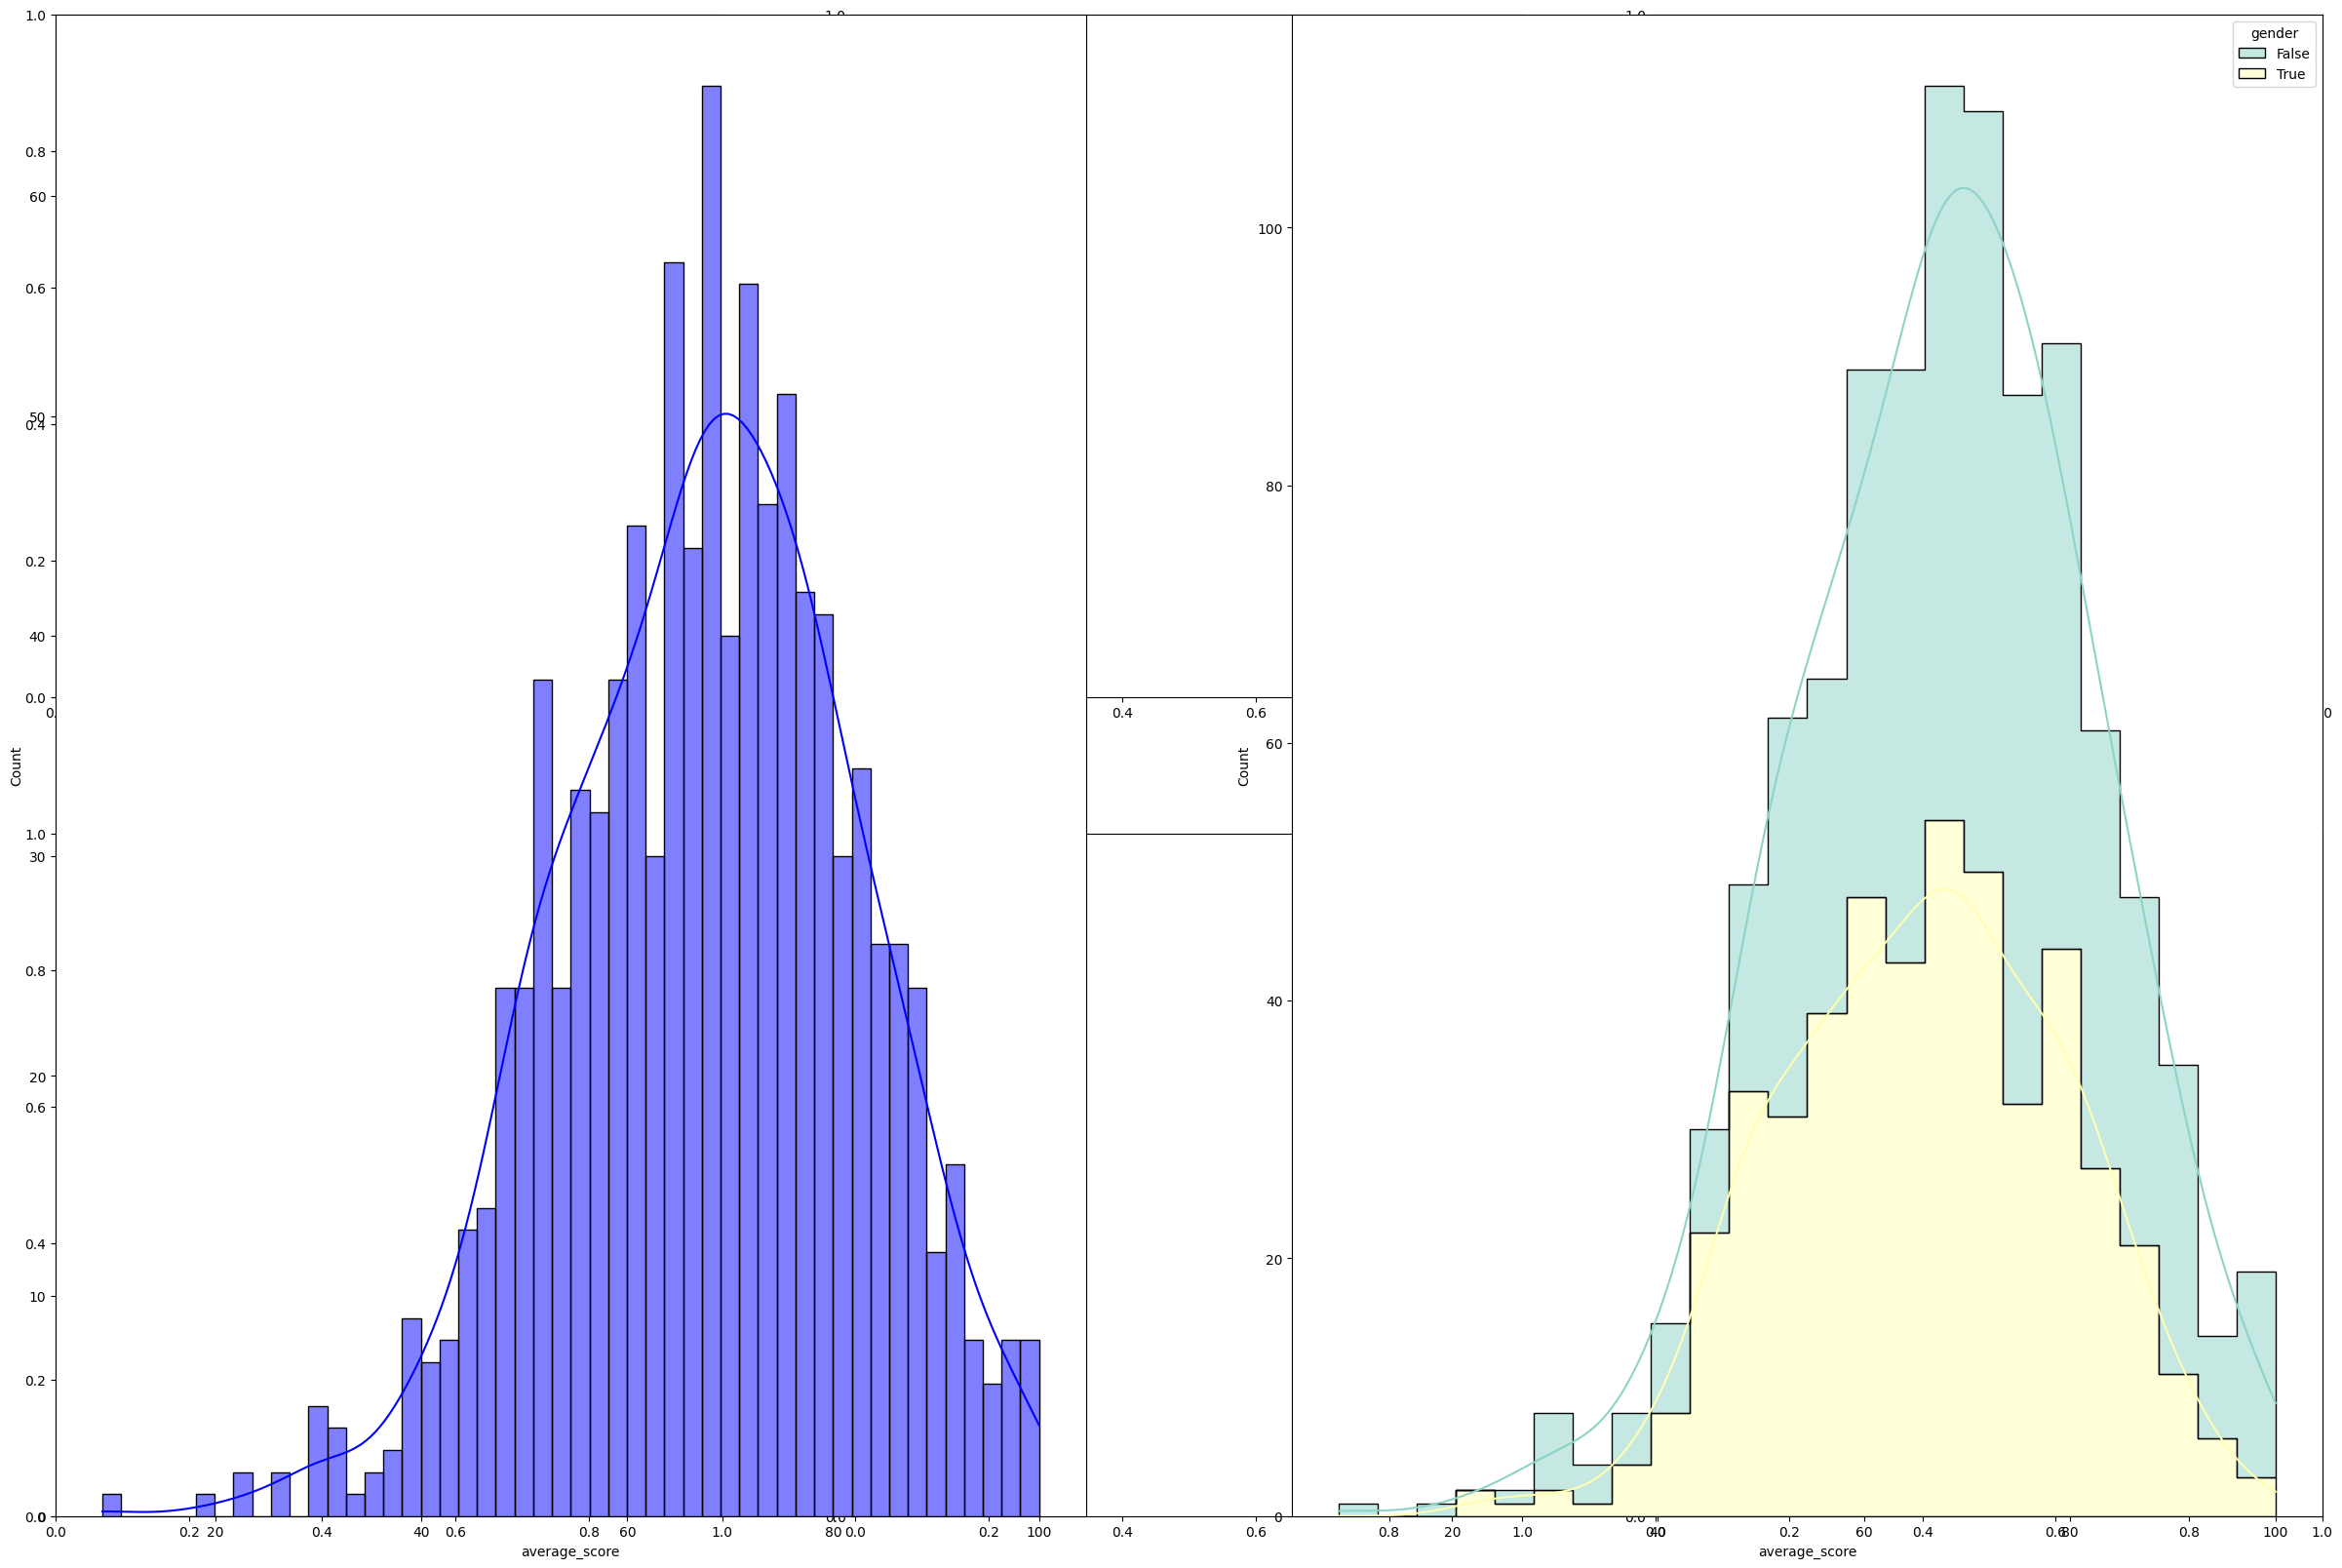

In [45]:
fig,ax = plt.subplots(2,3,figsize=(30,20))
plt.subplot(121)
sns.histplot(data = df , x = 'average_score' , kde = True , color = 'blue' , bins = 50)
plt.subplot(122)
sns.histplot(data = df , x = 'average_score' , kde = True , hue = df['gender']=='male' , multiple='stack',palette = 'Set3',element= 'step',fill = 'false')
plt.show()

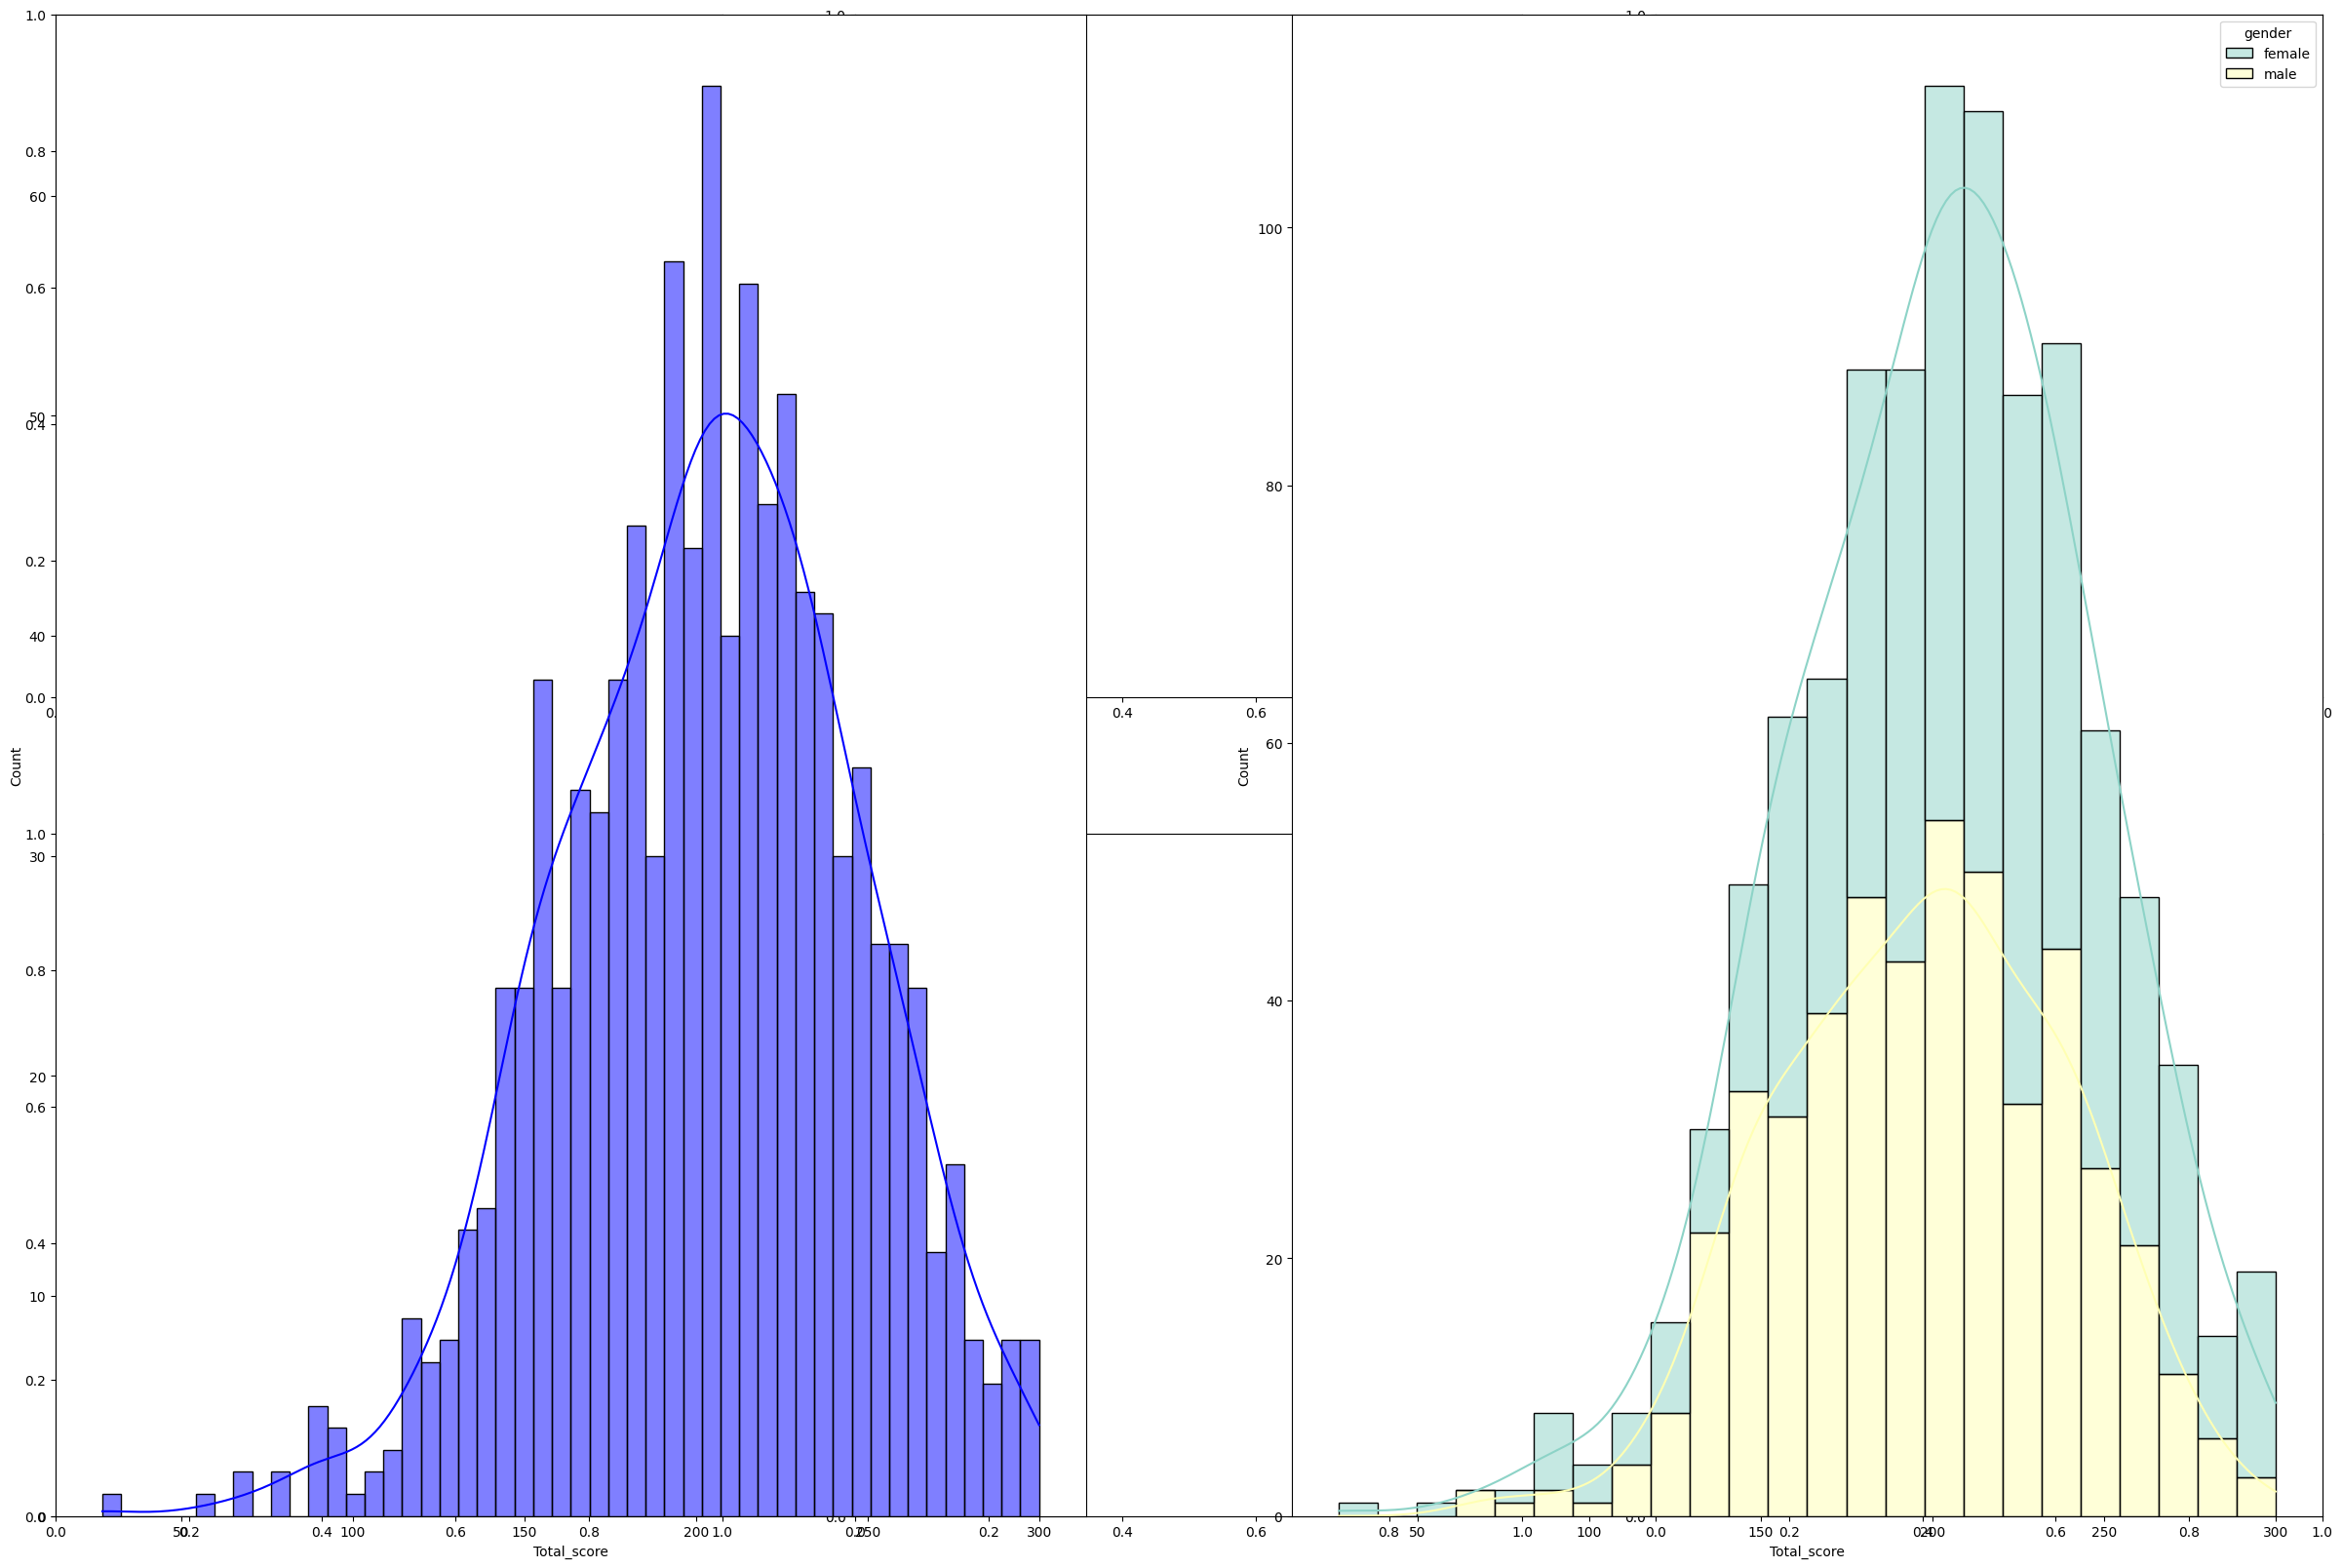

In [49]:
fig,ax = plt.subplots(2,3,figsize=(30,20))
plt.subplot(121)
sns.histplot(data = df , x = 'Total_score' , kde = True , color = 'blue' , bins = 50)
plt.subplot(122)
sns.histplot(data = df , x = 'Total_score' , kde = True , hue = 'gender' , multiple='stack',palette = 'Set3',element= 'bars',fill = 'false')
plt.show()

Female students tend perform well then male students